In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import cluster
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from fairlearn.preprocessing import CorrelationRemover
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Load Data

In [2]:
train_data = pd.read_csv("adult-train.csv", header=0, skiprows=[1,2])
test_data = pd.read_csv("adult-test.csv", header=0, skiprows=[1,2])
train_data

,Age,Workclass,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target
0,1,0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1,1,0,1,0
2,0,0,1,1,0,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32554,0,0,1,1,0,0,0,0,0,1,0
32555,1,0,0,1,0,0,0,1,0,1,1
32556,1,0,0,0,0,0,0,0,0,1,0
32557,0,0,0,0,0,0,0,1,0,1,0


In [3]:
train_y = train_data['Target']
train_x = train_data.drop(['Target'], axis=1)
test_y = test_data['Target']
test_x = test_data.drop(['Target'], axis=1)

## 2.1 Classification with Logistic Regression

In [4]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [5]:
acc = sum(pred_y == test_y) / len(test_y)
acc

0.8179249339640027

Text(0, 0.5, 'P(y=1)')

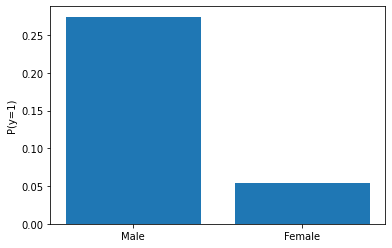

In [6]:
pos = pred_y[test_x['Sex'] == 1]
neg = pred_y[test_x['Sex'] == 0]
y_pos = sum(pos == 1) / len(pos)
y_neg = sum(neg == 1) / len(neg)

plt.bar(['Male', 'Female'], [y_pos, y_neg])
plt.ylabel('P(y=1)')

# 2.2 Fair Classification

In [15]:
cr = CorrelationRemover(sensitive_feature_ids=["Sex"])
train_x_cr = cr.fit_transform(train_x)
test_x_cr = cr.transform(test_x)

In [17]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x_cr, train_y)
pred_y = clf.predict(test_x_cr)

In [18]:
acc = sum(pred_y == test_y) / len(test_y)
acc

0.8119049081638922

Text(0, 0.5, 'P(y=1)')

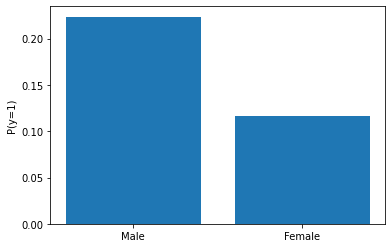

In [19]:
pos = pred_y[test_x['Sex'] == 1]
neg = pred_y[test_x['Sex'] == 0]
y_pos = sum(pos == 1) / len(pos)
y_neg = sum(neg == 1) / len(neg)

plt.bar(['Male', 'Female'], [y_pos, y_neg])
plt.ylabel('P(y=1)')